In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [7]:
def scale_mnist_data(train_images, test_images):
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    return train_images, test_images   

In [8]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [9]:
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [10]:
def get_model(input_shape):
    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8, (3,3), padding='SAME', activation='relu', input_shape=input_shape),
                                       tf.keras.layers.MaxPooling2D((2,2)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dense(10, activation='softmax')])
    return model

In [11]:
model = get_model(scaled_train_images[0].shape)

In [12]:
def compile_model(model):
    return model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  

In [13]:
compile_model(model)

In [14]:
def train_model(model, scaled_train_images, train_labels):
    history = model.fit(scaled_train_images, train_labels, epochs=5, verbose=2)
    return history

In [15]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
60000/60000 - 26s - loss: 0.2120 - accuracy: 0.9373
Epoch 2/5
60000/60000 - 25s - loss: 0.0748 - accuracy: 0.9775
Epoch 3/5
60000/60000 - 24s - loss: 0.0550 - accuracy: 0.9832
Epoch 4/5
60000/60000 - 24s - loss: 0.0418 - accuracy: 0.9866
Epoch 5/5
60000/60000 - 24s - loss: 0.0322 - accuracy: 0.9897


In [16]:
frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

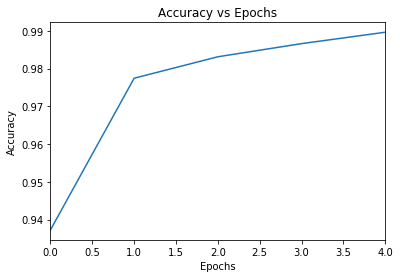

In [17]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

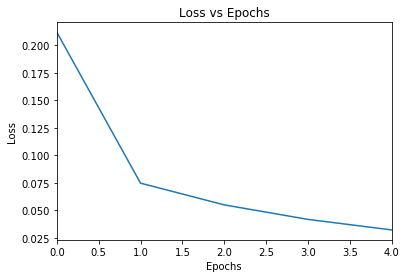

In [18]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [19]:
def evaluate_model(model, scaled_test_images, test_labels):
    return model.evaluate(scaled_test_images, test_labels, verbose=2)

In [20]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/10000 - 2s - loss: 0.0546 - accuracy: 0.9821
Test loss: 0.05459476504131453
Test accuracy: 0.9821000099182129


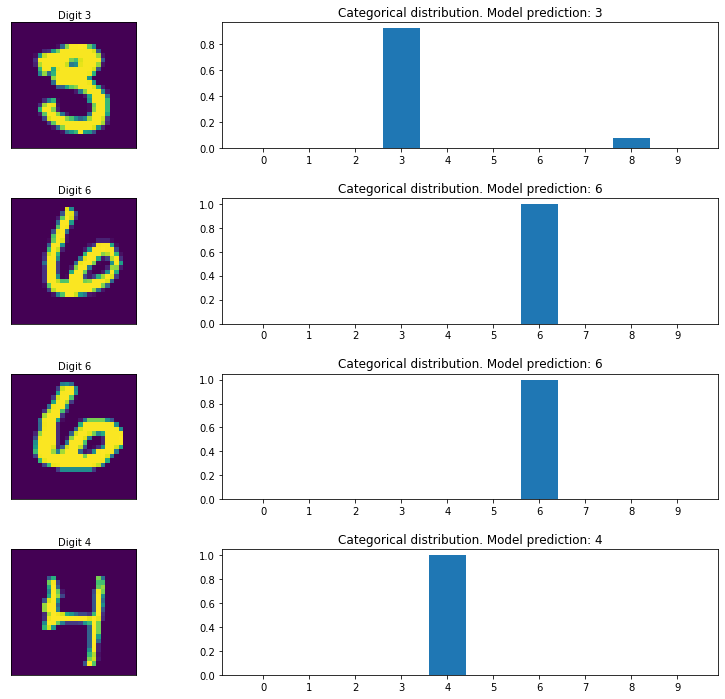

In [21]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()